# MODELO PROBABILISTICO

### AUTOR: CARLOS MOROCHO

Implementacion de un modelo probabilistico de infección por el virus Covid-19

Se realiza un análisis probabilistico simple del crecimiento de la infección en Python y el modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de probabilidad.

In [1]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Carga del dataset
df = pd.read_csv('datacovid.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
5,ABW,North America,Aruba,2020-03-23,NaN,NaN,0.286,NaN,NaN,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
6,ABW,North America,Aruba,2020-03-24,12.0,8.0,1.429,NaN,0.0,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
7,ABW,North America,Aruba,2020-03-25,17.0,5.0,2.143,NaN,0.0,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
8,ABW,North America,Aruba,2020-03-26,19.0,2.0,2.429,NaN,0.0,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
9,ABW,North America,Aruba,2020-03-27,28.0,9.0,3.429,NaN,0.0,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


Imprimos los resultados y agregamos el numero del dia


In [3]:
df = df[df['location'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df = df[(df.total_cases >= 1)]
df = df.loc[:,['date', 'new_cases', 'total_cases']] #Selecciono las columnas de analasis
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

,date,new_cases,total_cases
14430,60,1.0,1.0
14431,61,5.0,6.0
14432,62,1.0,7.0
14434,64,3.0,10.0
14435,65,3.0,13.0
14438,68,1.0,14.0
14439,69,1.0,15.0
14440,70,2.0,17.0
14443,73,6.0,23.0
14444,74,5.0,28.0


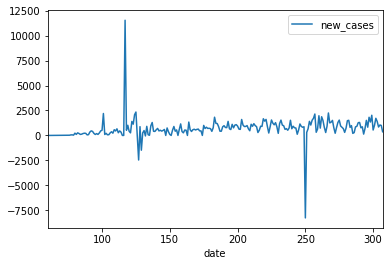

In [4]:

df.plot(x ='date', y='new_cases')

Ahora podemos analizar un modelo probabilisto para el examen.

## El modelo basado en probabilidad

Para realizar un estimacion del factor de crecimiento de los casos de Covid 19 en Ecuador calculamos la mediana, con esto obtenemo el valor medio de crecimiento de un conjunto de datos, con esto podemos obtener un factor de crecimiento o taza de crecimiento de los nuevos casos.



In [5]:

filtro = df["new_cases"] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)


660.0
697.7860082304527


De la ecuación de la recta y = mX + b nuestra pendiente «m» es el coeficiente y el término independiente «b»


In [6]:
#Vamos a comprobar:
# según la media y la mediana podemos obtener la taza de crecieminto y predicir su comportamiento.
# Cargamos los datos de total de casos
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
y = list(df_t.iloc [:, 1]) # Total casos
x = list(df_t.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

191569


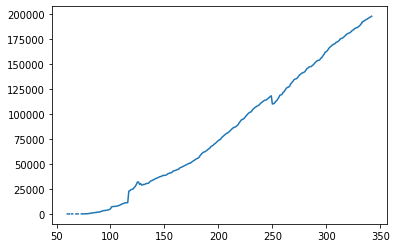

In [7]:
# Quiero predecir cuántos "Casos" voy a obtener de aqui a 10 dias.
for i in range(x[-1], x[-1]+10):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x[61:], y[61:])
plt.show()

# Practica

1. Comparar el modelo de predicion matematico vs probabilidad.
2. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

Puntos extras: Investigas sobre la correlacion de variables y aplicar el calculo en base a los datos del Ecuador.

## 1. Comparar el modelo de predicion matematico vs probabilidad.

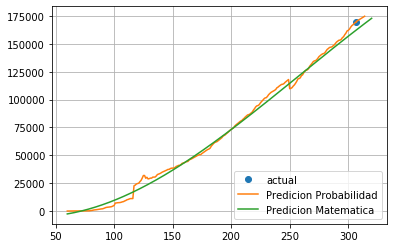

In [8]:

#Implementar
# predicion probabilidad
x = list(df.iloc [:, 0]) # Dias 
y = list(df.iloc [:, 2]) # Total casos
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)

plt.plot(x[-1],y[-1],'o',label='actual')

#predicion a una semana
for i in range(x[-1], x[-1]+8):
    x.append(i)
    y.append(int(y[-1] + mediana))

#predicion matematica 
x1 = np.array(x)
y1 = np.array(y)  
def func_polinomial(x, a, b, c, d):
    return a*x**4 + b*x**3 + c*x**2 + d*x + 1

popt1, pcov1 = curve_fit(func_polinomial, x1, y1)
pred_x = list(range(min(x1),max(x1)+7))

pred_x = np.array(pred_x, dtype=float)
#grficamos los dos metodos para analizar


plt.plot(x, y,label='Predicion Probabilidad')
plt.plot(pred_x,func_polinomial(pred_x,*popt1),label='Predicion Matematica')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## 2. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

162816


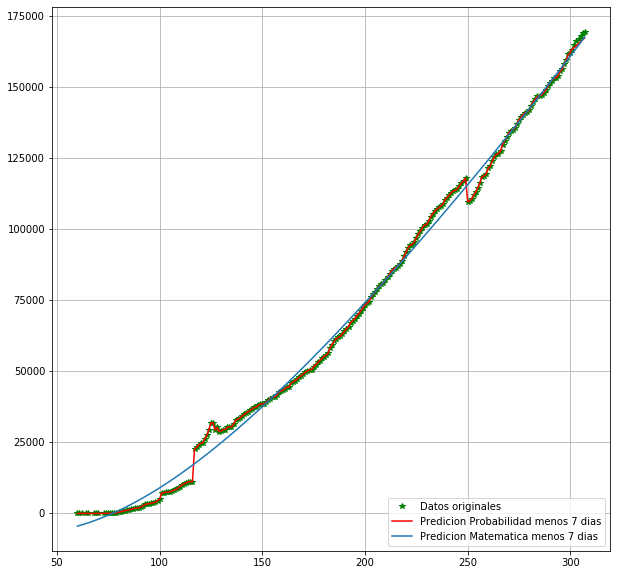

In [9]:
df2 = pd.read_csv('datacovid.csv')

df2 = df2[df2['location'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df2 = df2[(df2.total_cases >= 1)]
df2 = df2.loc[:,['date', 'new_cases', 'total_cases']] #Selecciono las columnas de analasis
FMT = '%Y-%m-%d'
date = df2['date']

df2['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

data = df2[:-7]

#Modelo probablistico
filtro1 = data["new_cases"] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media1 = filtro1.mean()
mediana1 = filtro1.median()

y1 = list(data.iloc [:, 2]) # Total casos
x1 = list(data.iloc [:, 0]) # Dias

#Realizamos un ejemplo de prediccion
prediccion_siguiente1 = int(y1[-1] + mediana1)
print(prediccion_siguiente1)

for i in range(x1[-1], x1[-1]+8):
    x1.append(i)
    y1.append(int(y1[-1] + mediana))


#modelo matematico
x1 = np.array(x1, dtype=float)
y1 = np.array(y1, dtype=float)
def func_polinomial(x, a, b, c, d):
    return a*x**4 + b*x**3 + c*x**2 + d*x + 1

popt1, pcov1 = curve_fit(func_polinomial, x1, y1)

x2 = df2.date
y2 = df2.total_cases

plt.figure(figsize=(10,10))
plt.plot(x2, y2,'g*',label='Datos originales')
plt.plot(x1, y1,color='r',label='Predicion Probabilidad menos 7 dias')
plt.plot(x1,func_polinomial(x1,*popt1),label='Predicion Matematica menos 7 dias')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()





## Analisis

En el segundo punto, al cargar la información con menos 7 días, de los datos originales y luego hacer uso de los dos métodos tanto matemático como el de probabilidad y prediciendo 7 días más podemos observar que ambos nos dan una aproximación similar en datos y al comparar y graficar los datos originales se observa que con la proyección se obtiene un número más bajo de infectados que son los que se tiene en la actualidad, el número de infectados es de 162816 mil casos.


## Conclusiones

Estos modelos deben ser usados como referencia y con mas datos se puede lograr una predicción mucho mayor, se recomienda el investigar sobre nuevas técnicas o combinaciones que mejoren los resultados del modelo.

### Criterio personal (Político, económico y social de la situación)

Debido a todo el caos que provoco el virus en todo el mundo, estos modelos de prediccon que si bien no son del todo exactos pueden ayudarnos a solventar algunas respuestas que todo la sociedad esta buscando, existen millones de empresas que de seguro estan desarrollando estos sistemas devido a la contingencia pero creo que ningunoo veneficia a la sociedad como la informacion como tal.